#### 텍스트 데이터 수집
#### 한글이므로 Konlpy 사용
#### konlpy에서 제공하는 corpus모듈에서 kolaw를 import 시켜 사용
#### 대한민국헌법 : 18,884 자로 이루어짐


In [ ]:
!pip install konlpy

# NLP : Natural Language Processing
from konlpy.corpus import kolaw

corpus = kolaw.open('constitution.txt').read()
print(len(corpus))
print(corpus[:100])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 28.9 MB/s eta 0:00:00
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


#### 자연어 처리: NLP : Natural Language Processing
#### 자연어 데이터 에서 특수기호, 숫자등을 정제(re)해야함 -> 형태소 단위로 분류 -> 불용어 제거 -> 명사추출

In [ ]:
# 텍스트 정제
import re

def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'   # E-mail제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'                                   # 한글 자음, 모음 제거
    text = re.sub(pattern, '', text)
    pattern = '([a-zA-Z0-9]+)'                                    # 알파벳, 숫자 제거
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'                                          # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'                                           # 특수기호제거
    text = re.sub(pattern, '', text)
    return text


In [ ]:
corpus = text_clean(corpus)
corpus[:200]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 민주이념을 계승하고 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의인도와 동포애로써 민족의 단결을 공고히 하고 모든 사회적 폐습과 불의를 타파하며 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치경제사회문화의 모든 영역에'

In [ ]:
# 형태소 분석
!apt-get update
!apt-get install -y g++ openjdk-8-jdk python3-dev python3-pip curl
!rm -rf /tmp/mecab-python-0.996       # Remove the local copy of mecab-python-0.996
!pip3 install mecab-python3            # Install the latest version of mecab-python3
!pip3 install --upgrade konlpy          # Reinstall konlpy


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,501 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [ ]:
# 형태소 분석
from konlpy.tag import Okt

okt = Okt()
tokens = okt.nouns(corpus)

print(tokens[:50])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제사', '회문', '모든', '영역']


In [ ]:
# 불용어 처리(stopwords) 및 한자 이상 단어 추출
stop_words = "기타 헌법"
stop_words = stop_words.split(" ")

st_tokens = []
for token in tokens:
  if token not in stop_words:
    st_tokens.append(token)

tokens = st_tokens    # 변수의 편의성을 위해 다시 tokens로 변수명을 바꿔줌.

tokens = [token for token in tokens if len(token) > 1]
print(tokens[:50])

['대한민국', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제사', '회문', '모든', '영역', '각인', '기회', '능력', '최고']


In [ ]:
# 단어 빈도수 측정
from collections import Counter

nouns_counter = Counter(tokens)
top_nouns = dict(nouns_counter.most_common(30))    # 딕셔너리 형태로 상위 30개 저장
top_nouns

{'제조': 136,
 '법률': 127,
 '대통령': 83,
 '국가': 73,
 '국회': 68,
 '국민': 61,
 '모든': 37,
 '사항': 23,
 '권리': 21,
 '자유': 20,
 '정부': 20,
 '선거': 20,
 '의원': 20,
 '임명': 20,
 '직무': 19,
 '국무총리': 19,
 '의무': 18,
 '조직': 18,
 '국회의원': 18,
 '임기': 18,
 '의결': 17,
 '공무원': 17,
 '경제': 17,
 '경우': 17,
 '이상': 17,
 '국무위원': 17,
 '대법원': 17,
 '범위': 16,
 '법관': 15,
 '보호': 14}

In [ ]:
# 코랩에 한글 폰트(나눔바른고딕설치)
!apt -qq -y install fonts-nanum     # -qq:메시지를 출력하지 않음(오류 제외), -y: 모든 질문 표시 없이 예라고 답하기

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 125425 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# matplotlib에서 한글 폰트를 사용할 수 있도록 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 높은 해상도로 �폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBamkend.figure_format = 'retina'

# matplotlib가 사용하는 폰트 경로 확인
#font_path='./font/NanumBarunGothic.ttf'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # NanumBareunGothic을 NanumBarunGothic으로 변경

# 폰트 캐시 업데이트
#!fc-cache -fv

# 폰트 경로를 전달해 폰트이름을 가져옴
font_name = fm.FontProperties(fname=fontpath, size=10).get_name()

# matplotlib가 사용할 글꼴을 나눔바른고딕으로 변경
plt.rc('font', family=font_name)

# 폰트 매니저 리빌딩 (선 선택적)
#fm._rebuild()  # fm으로 변경

mpl.rcParams['font.family'] = font_name

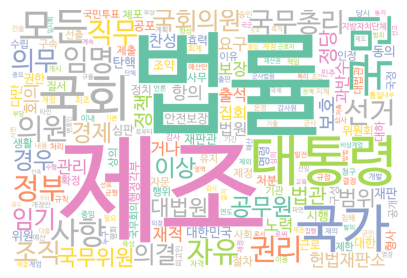

In [ ]:
#Wordcloud (네모)
!pip install wordcloud STOPWORDS

from wordcloud import WordCloud, STOPWORDS  # Import STOPWORDS from wordcloud
import matplotlib.pyplot as plt

# 배경색과 폰트지정

wc= WordCloud(width = 3000, height = 2000, random_state=1,
              background_color='white', colormap='Set2',
              collocations=False, stopwords = STOPWORDS, # Now STOPWORDS is defined
              font_path='./font/NanumBarunGothic.ttf')

# 워드클아우드 생성
wc.generate_from_frequencies(nouns_counter)    # 빈도수가 구해진 전체 단어plt.

# pyplot을 이용해 시각화
plt.figure(figsize=(5, 5))
plt.imshow(wc)
plt.axis("off")
plt.show()

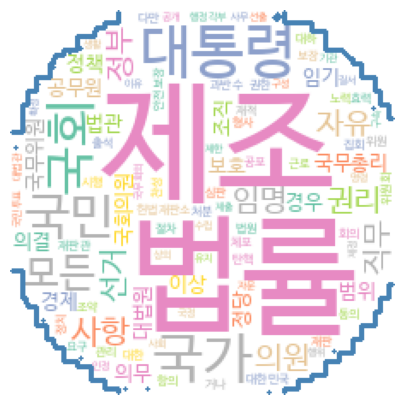

In [ ]:
#Wordcloud (원)
!pip install wordcloud STOPWORDS

from wordcloud import WordCloud, STOPWORDS  # Import STOPWORDS from wordcloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import *


# 배경색과 폰트지정

cand_mask=np.array(Image.open('/content/sample_data/circle.jpg'))

wc= WordCloud(width = 3000, height = 2000, random_state=1,
              background_color='white', colormap='Set2',
              collocations=False, stopwords = STOPWORDS, # Now STOPWORDS is defined
              mask=cand_mask, contour_width=3, contour_color='steelblue',
              font_path='./font/NanumBarunGothic.ttf')

# 워드클아우드 생성
wc.generate_from_frequencies(nouns_counter)    # 빈도수가 구해진 전체 단어plt.

# pyplot을 이용해 시각화
plt.figure(figsize=(5, 5))
plt.imshow(wc)
plt.axis("off")
plt.show()